In [ ]:
!pip install bertopic

In [1]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/MyDrive/Capstone Project/Models Comparison/"

In [ ]:
data_path1 = "/content/drive/MyDrive/Capstone/Table/"

In [ ]:
bert_topics = pd.read_csv(data_path1+"top_words_all-MiniLM-L6-v2_20_(1, 1)_10_10_50.csv")
bert_assign = pd.read_csv(data_path1+"assignments_all-MiniLM-L6-v2_20_(1, 1)_10_10_50.csv")


In [ ]:
lda_assign = pd.read_csv(data_path+"LDA3_emails_assignments.csv")
lda_topics = pd.read_csv(data_path+"LDA3_topics.csv")

## Get assigns

In [ ]:
bert_assign['topic'] = bert_assign['topic'].apply(lambda x:x+1)

In [ ]:
bert_assign

,Unnamed: 0,email_id,clean_body,email,topic,probs
0,0,allen-p\all_documents\107#1,brenda please use second check october payment...,person please use second check october payment...,2,1.000000e+00
1,1,allen-p\all_documents\112#1,structure typically structure limited partners...,structure typically structure limited partners...,8,8.584494e-306
2,2,allen-p\all_documents\118#1,jeff closing today reviewing agreement find bi...,person closing today reviewing agreement find ...,3,3.499324e-01
3,3,allen-p\all_documents\121#1,forwarded phillip allenhouect 09252000 0200 in...,forwarded phillip allenhouect 09252000 0200 in...,5,1.000000e+00
4,4,allen-p\all_documents\146#1,internet data gain major power drain local uti...,internet data gain major power drain local uti...,10,1.000000e+00
...,...,...,...,...,...,...
33774,33774,zufferli-j\sent_items\42#3,john may able something tyler issue however re...,person may able something tyler issue however ...,3,4.661875e-01
33775,33775,zufferli-j\sent_items\57#4,internet address directory detail put togethor...,internet address directory detail put togethor...,1,1.126116e-01
33776,33776,zufferli-j\sent_items\59#3,things going well working cleaning dec cautiou...,things going well working cleaning dec cautiou...,9,8.990792e-02
33777,33777,zufferli-j\sent_items\63#1,server3003freeyellowcomautomatch94por36thtml,server3003freeyellowcomautomatch94por36thtml,1,5.523934e-02


In [ ]:
df1 = lda_assign.merge(bert_assign, left_on = 'document', right_on = 'email_id')[['email_id','topic_x','topic_y']].rename(columns = {'topic_x':'LDA topic','topic_y':'BERTopic topic'})

In [ ]:
df1.to_csv(data_path+'LDA_BERTopic_assigns.csv')

In [ ]:
df1

,email_id,LDA topic,BERTopic topic
0,allen-p\all_documents\107#1,10,2
1,allen-p\all_documents\112#1,3,8
2,allen-p\all_documents\118#1,10,3
3,allen-p\all_documents\121#1,6,5
4,allen-p\all_documents\146#1,7,10
...,...,...,...
33774,zufferli-j\sent_items\42#3,10,3
33775,zufferli-j\sent_items\57#4,10,1
33776,zufferli-j\sent_items\59#3,10,9
33777,zufferli-j\sent_items\63#1,4,1


## Weighted average embedding

In [ ]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')


In [ ]:
lda_topics['embedding'] = [x for x in embedding_model.encode(lda_topics['term'])]

In [ ]:
lda_topics = lda_topics.assign(beta_sum=lda_topics.groupby('topic')['beta'].transform('sum'))

In [ ]:
lda_topics['topic_embedding'] = lda_topics.apply(lambda row: row['beta']*row['embedding']/row['beta_sum'], axis = 1)

In [ ]:
lda_topic = lda_topics.groupby(['topic'])['topic_embedding'].sum().to_frame(name = 'embedding').reset_index()

In [ ]:
lda = lda_assign.merge(lda_topic, on = 'topic')[['document', 'embedding','topic']]
lda

,document,embedding,topic
0,allen-p\all_documents\107#1,"[-0.07335534, 0.019896809, -0.032761727, -0.00...",10
1,allen-p\all_documents\118#1,"[-0.07335534, 0.019896809, -0.032761727, -0.00...",10
2,allen-p\all_documents\148#1,"[-0.07335534, 0.019896809, -0.032761727, -0.00...",10
3,allen-p\all_documents\154#2,"[-0.07335534, 0.019896809, -0.032761727, -0.00...",10
4,allen-p\all_documents\16#2,"[-0.07335534, 0.019896809, -0.032761727, -0.00...",10
...,...,...,...
33774,wolfe-j\inbox\143#2,"[-0.057648446, 0.025307244, -0.030141264, 0.00...",4
33775,zipper-a\broker_client\5#1,"[-0.057648446, 0.025307244, -0.030141264, 0.00...",4
33776,zipper-a\broker_client\7#1,"[-0.057648446, 0.025307244, -0.030141264, 0.00...",4
33777,zipper-a\deleted_items\510#1,"[-0.057648446, 0.025307244, -0.030141264, 0.00...",4


In [ ]:
bert_topics['embedding'] = [x for x in embedding_model.encode(bert_topics['top_words'])]
bert_topics = bert_topics.assign(beta_sum=bert_topics.groupby('topic')['c-tf-idf'].transform('sum'))
bert_topics['topic_embedding'] = bert_topics.apply(lambda row: row['c-tf-idf']*row['embedding']/row['beta_sum'], axis = 1)
bert_topic = bert_topics.groupby(['topic'])['topic_embedding'].sum().to_frame(name = 'embedding').reset_index()

In [ ]:
bert = bert_assign.merge(bert_topic, on = 'topic')[['email_id', 'embedding','topic']]
bert['topic'] = bert['topic'].apply(lambda x:x+1)
bert

,email_id,embedding,topic
0,allen-p\all_documents\107#1,"[-0.04566472, 0.043740828, -0.040670186, 0.020...",2
1,allen-p\all_documents\16#2,"[-0.04566472, 0.043740828, -0.040670186, 0.020...",2
2,allen-p\all_documents\175#1,"[-0.04566472, 0.043740828, -0.040670186, 0.020...",2
3,allen-p\all_documents\176#1,"[-0.04566472, 0.043740828, -0.040670186, 0.020...",2
4,allen-p\all_documents\200#1,"[-0.04566472, 0.043740828, -0.040670186, 0.020...",2
...,...,...,...
33774,zipper-a\sent_items\144#1,"[-0.038035724, 0.018987468, -0.023823166, 0.01...",6
33775,zipper-a\sent_items\210#1,"[-0.038035724, 0.018987468, -0.023823166, 0.01...",6
33776,zipper-a\sent_items\48#1,"[-0.038035724, 0.018987468, -0.023823166, 0.01...",6
33777,zufferli-j\sent_items\119#2,"[-0.038035724, 0.018987468, -0.023823166, 0.01...",6


## Top word embedding

In [ ]:
lda_topic = lda_topics[lda_topics.groupby(['topic'])['beta'].transform(max) == lda_topics['beta']]
lda = lda_assign.merge(lda_topic, on = 'topic')[['document', 'term']]
lda

,document,term
0,allen-p\all_documents\107#1,would
1,allen-p\all_documents\118#1,would
2,allen-p\all_documents\148#1,would
3,allen-p\all_documents\154#2,would
4,allen-p\all_documents\16#2,would
...,...,...
33774,wolfe-j\inbox\143#2,font
33775,zipper-a\broker_client\5#1,font
33776,zipper-a\broker_client\7#1,font
33777,zipper-a\deleted_items\510#1,font


In [ ]:
bert_topic = bert_topics[bert_topics.groupby(['topic'])['c-tf-idf'].transform(max) == bert_topics['c-tf-idf']]
bert = bert_assign.merge(bert_topic, on = 'topic')[['email_id', 'top_words']]

In [ ]:
bert['embedding'] = [x for x in embedding_model.encode(bert['top_words'])]

In [ ]:
lda['embedding'] = [x for x in embedding_model.encode(lda['term'])]

In [ ]:
df = df.rename(columns = {'term':'LDA','top_words':'BERTopic'}).sort_values(by=['cos_sim'], ascending=False)

## Calculate cosine similarities

In [ ]:
df = lda.merge(bert, left_on = 'document', right_on = 'email_id')

In [ ]:
df['cos_sim'] = [cosine_similarity(x.reshape(1,-1), y.reshape(1,-1))[0][0] for x, y in zip(df['embedding_x'], df['embedding_y'])]

In [ ]:
name = {'topic_x':'LDA', 'topic_y':'BERTopic', 'embedding_x': 'LDA embedding', 'embedding_y': 'BERTopic embedding'}
df = df[['email_id','topic_x','topic_y','cos_sim','embedding_x','embedding_y']].rename(columns = name)
df

,email_id,LDA,BERTopic,cos_sim,LDA embedding,BERTopic embedding
0,allen-p\all_documents\107#1,10,2,0.846855,"[-0.07335534, 0.019896809, -0.032761727, -0.00...","[-0.04566472, 0.043740828, -0.040670186, 0.020..."
1,allen-p\all_documents\118#1,10,3,0.803876,"[-0.07335534, 0.019896809, -0.032761727, -0.00...","[-0.05467723, 0.039420795, -0.02648932, -0.004..."
2,allen-p\all_documents\148#1,10,9,0.856512,"[-0.07335534, 0.019896809, -0.032761727, -0.00...","[-0.053000025, 0.02929648, -0.032104857, 0.005..."
3,allen-p\all_documents\154#2,10,9,0.856512,"[-0.07335534, 0.019896809, -0.032761727, -0.00...","[-0.053000025, 0.02929648, -0.032104857, 0.005..."
4,allen-p\all_documents\16#2,10,2,0.846855,"[-0.07335534, 0.019896809, -0.032761727, -0.00...","[-0.04566472, 0.043740828, -0.040670186, 0.020..."
...,...,...,...,...,...,...
33774,wolfe-j\inbox\143#2,4,1,0.754004,"[-0.057648446, 0.025307244, -0.030141264, 0.00...","[-0.058856692, 0.03323342, -0.023891665, 0.010..."
33775,zipper-a\broker_client\5#1,4,6,0.716993,"[-0.057648446, 0.025307244, -0.030141264, 0.00...","[-0.038035724, 0.018987468, -0.023823166, 0.01..."
33776,zipper-a\broker_client\7#1,4,6,0.716993,"[-0.057648446, 0.025307244, -0.030141264, 0.00...","[-0.038035724, 0.018987468, -0.023823166, 0.01..."
33777,zipper-a\deleted_items\510#1,4,1,0.754004,"[-0.057648446, 0.025307244, -0.030141264, 0.00...","[-0.058856692, 0.03323342, -0.023891665, 0.010..."


In [ ]:
df.sort_values(by=['cos_sim'], ascending=False)

,email_id,LDA topic,BERTopic topic,cos_sim,LDA embedding,BERTopic embedding
22929,dasovich-j\deleted_items\1995#1,7,10,0.976469,"[-0.04406993, 0.05427243, -0.017674275, 0.0429...","[-0.04406747, 0.050346896, -0.022221103, 0.044..."
23303,lay-k\deleted_items\865#1,7,10,0.976469,"[-0.04406993, 0.05427243, -0.017674275, 0.0429...","[-0.04406747, 0.050346896, -0.022221103, 0.044..."
22922,dasovich-j\deleted_items\1708#1,7,10,0.976469,"[-0.04406993, 0.05427243, -0.017674275, 0.0429...","[-0.04406747, 0.050346896, -0.022221103, 0.044..."
23196,lavorato-j\sent_items\386#1,7,10,0.976469,"[-0.04406993, 0.05427243, -0.017674275, 0.0429...","[-0.04406747, 0.050346896, -0.022221103, 0.044..."
23294,lay-k\deleted_items\792#1,7,10,0.976469,"[-0.04406993, 0.05427243, -0.017674275, 0.0429...","[-0.04406747, 0.050346896, -0.022221103, 0.044..."
...,...,...,...,...,...,...
3117,fossum-d\all_documents\657#1,10,6,0.653757,"[-0.07335534, 0.019896809, -0.032761727, -0.00...","[-0.038035724, 0.018987468, -0.023823166, 0.01..."
5946,keiser-k\sent_items\354#1,10,6,0.653757,"[-0.07335534, 0.019896809, -0.032761727, -0.00...","[-0.038035724, 0.018987468, -0.023823166, 0.01..."
7127,maggi-m\inbox\33#3,10,6,0.653757,"[-0.07335534, 0.019896809, -0.032761727, -0.00...","[-0.038035724, 0.018987468, -0.023823166, 0.01..."
5707,kean-s\all_documents\4875#3,10,6,0.653757,"[-0.07335534, 0.019896809, -0.032761727, -0.00...","[-0.038035724, 0.018987468, -0.023823166, 0.01..."


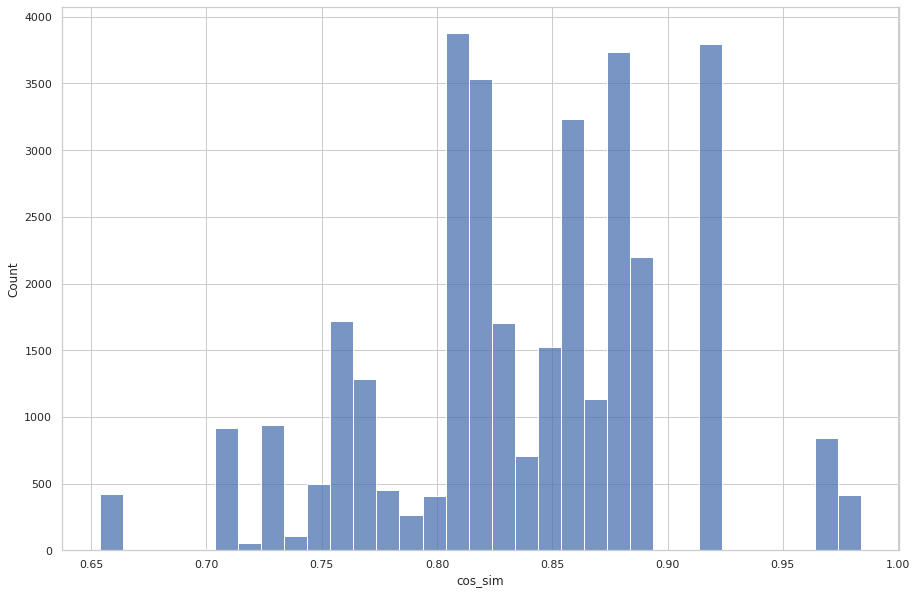

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=df['cos_sim'], binwidth = 0.01)

In [ ]:
df.to_csv(data_path+'Weighted_average_similarity.csv')

In [ ]:
df[['email_id','term','top_words','cos_sim']].to_csv(data_path+'Top_word_similarity.csv')

In [ ]:
df = pd.read_csv(data_path+'similarity.csv')

In [ ]:
df = df.reset_index().drop(columns = ['Unnamed: 0','index'])

In [ ]:
df.sample(frac=1).reset_index().drop(columns = ['Unnamed: 0','index'])

,email_id,LDA,BERTopic,cos_sim
0,zipper-a\deleted_items\74#2,image,person,0.436997
1,love-p\sent_items\728#1,would,person,0.219077
2,haedicke-m\inbox\640#1,please,agreement,0.273246
3,sanders-r\all_documents\405#2,would,person,0.219077
4,sanders-r\all_documents\515#1,email,agreement,0.281561
...,...,...,...,...
33774,perlingiere-d\all_documents\1986#1,please,person,0.224726
33775,rogers-b\all_documents\1307#4,would,person,0.219077
33776,mann-k\inbox\258#1,email,intended,0.248043
33777,martin-t\deleted_items\183#2,would,person,0.219077


In [ ]:
df.to_csv(data_path+'similarity.csv')

In [ ]:
bert_topics[['email_id','topic']]

,Unnamed: 0,email_id,email,subject,clean_text,topic,probs
0,0,allen-p\all_documents\100#2,"PERSON , \r\n\r\n Please use the second check ...",Consolidated positions : Issues & To Do list,person please use second check october payment...,4,1.780413e-01
1,1,allen-p\all_documents\101#2,STRUCTURE : \r\n Typically the structure is a ...,Consolidated positions : Issues & To Do list,structure typically structure limit partnershi...,0,5.472874e-01
2,3,allen-p\all_documents\103#1,---------------------- Forwarded by PERSON on ...,Re : 2001 Margin Plan,forward person pm invitation chairperson perso...,1,4.712257e-01
3,4,allen-p\all_documents\104#1,Internet Data Gain Is a Major Power Drain on \...,"Var, Reporting and Resources Meeting",internet data gain major power drain local uti...,0,6.658084e-02
4,5,allen-p\all_documents\105#1,Do not underestimate the effects of the Intern...,Westgate,underestimate effect internet economy load gro...,0,8.694132e-01
...,...,...,...,...,...,...,...
32782,33773,guzman-m\all_documents\1698#1,can we possibly move this meeting up from 3:30...,"Duke Energy , Okanagon P&E , Douglas County",possibly move meet pm sooner,1,1.000000e+00
32783,33774,guzman-m\all_documents\1699#1,"PERSON , we may be able to do something for Ty...",Re : Civil War,person may able something tyler issue however ...,3,1.000000e+00
32784,33775,guzman-m\all_documents\1712#1,do you have the internet addresses and directo...,PERSON at Montana System that needs to be sold...,internet address directory detail put togethor...,4,1.431856e-01
32785,33776,guzman-m\all_documents\1713#3,Things are going well here . We have been work...,Fwd : California Power Plants Get Jolt As Natu...,things go well work clean december cautiously ...,0,3.561628e-01
